### Практическая работа №3: Статистический анализ социальных сетей
Выполнил студент гр. 0382 Прибылов Никита. Вариант №20

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** $-$ тройка чисел $M, A, N$, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = C^2_g - A - M$

**Индекс взаимности Каца-Пауэлла** $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

$-\infty < \rho_{кр} \leqslant 1$.

Если $\rho_{кр} = 0$, то акторы не имеют склонности взаимно выбирать друг друга.

Если $\rho_{кр} = 1$, то акторы показывают максимальную тенденцию к взаимному выбору друг друга.

Если $\rho_{кр} < 0$, то акторы склонны образовывать односторонние связи или не образовывать их вообще.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}.$

**Индекс взаимности Бандиопадхьяйя** $-$ индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g,$

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+}).$

**Вычисление доверительного интервала для оценки P.**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

Доверительный интервал: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 1 - 0.5 \alpha$, где $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [10]:
library(igraph)
library(statnet)

In [2]:
g <- 85
p <- 0.63
P0 <- 0.64
alpha <- 0.02

1. Был смоделирован случайный орграф на основе модели Эрдеша-Реньи. Модель крайне проста: каждое ребро имеет фиксированную вероятность присутствия или отсутствия, не зависимую от других ребер.

In [6]:
graph <- erdos.renyi.game(g, p, directed=TRUE)
graph

IGRAPH 4d1b192 D--- 85 4416 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from 4d1b192:
 [1]  1->85  2-> 1  6-> 1  7-> 1  8-> 1 11-> 1 12-> 1 13-> 1 14-> 1 16-> 1
[11] 17-> 1 18-> 1 19-> 1 21-> 1 23-> 1 24-> 1 25-> 1 27-> 1 31-> 1 32-> 1
[21] 34-> 1 35-> 1 36-> 1 37-> 1 38-> 1 41-> 1 42-> 1 44-> 1 45-> 1 46-> 1
[31] 47-> 1 48-> 1 49-> 1 51-> 1 52-> 1 53-> 1 54-> 1 55-> 1 56-> 1 57-> 1
[41] 58-> 1 60-> 1 61-> 1 63-> 1 64-> 1 65-> 1 66-> 1 67-> 1 69-> 1 70-> 1
[51] 71-> 1 72-> 1 73-> 1 74-> 1 75-> 1 76-> 1 77-> 1 78-> 1 79-> 1  1-> 2
[61]  5-> 2  6-> 2  7-> 2  8-> 2  9-> 2 10-> 2 13-> 2 14-> 2 15-> 2 17-> 2
[71] 19-> 2 20-> 2 21-> 2 22-> 2 23-> 2 26-> 2 28-> 2 31-> 2 32-> 2 33-> 2
+ ... omitted several edges

2. Был отображен полученный орграф.

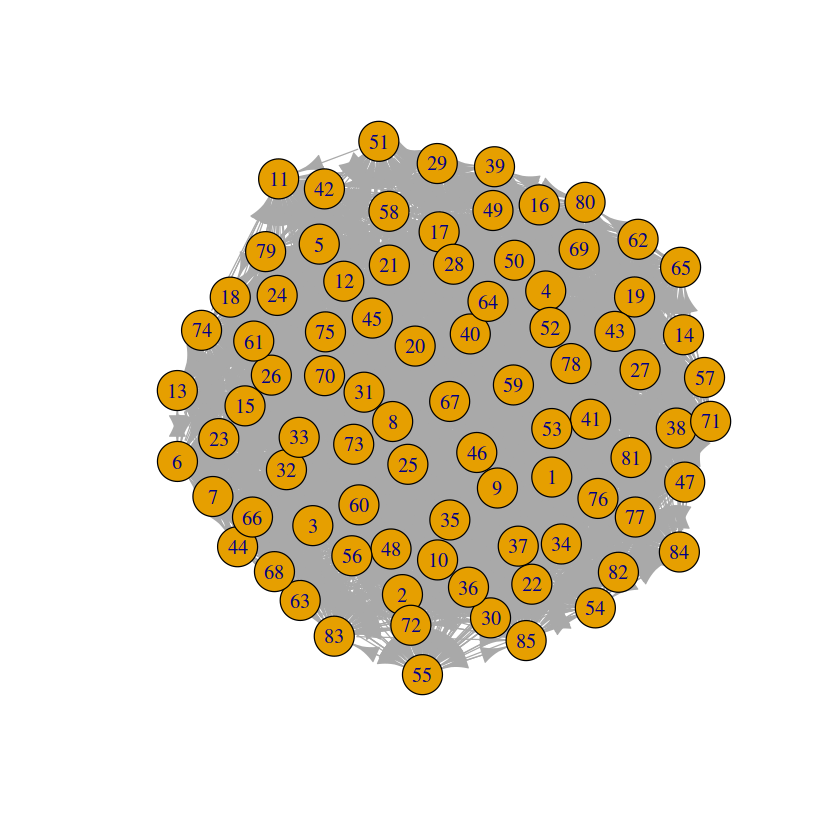

In [8]:
plot(graph)

3. Была вычислена пятичисловая сводка для графа.

In [24]:
net <- network(as_adjacency_matrix(graph), directed = TRUE)

cat("Размер = ", network.size(net))
cat("\nПлотность = ", gden(net))
cat("\nЧисло компонент = ", components(net))
cat("\nДиаметр = ", diameter(graph))
cat("\nКоэффициент кластеризации = ", gtrans(net))

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



Размер =  85
Плотность =  0.6184874
Число компонент =  1
Диаметр =  2
Коэффициент кластеризации =  0.6174246

4. Был вычислен цензус диад.

In [64]:
census <- dyad_census(graph)
cat('Число взаимных диад:', census$mut)
cat('\nЧисло асимметричных диад:', census$asym)
cat('\nЧисло нулевых диад:', census$null)

Число взаимных диад: 1375
Число асимметричных диад: 1666
Число нулевых диад: 529

5. Была вычислена оценка индекса взаимности Каца—Пауэла при фиксированом выборе акторов $d$ и при свободном выборе.

In [140]:
#d <- sample(1:g-1, 1)
d <- 33
index_for_mutuality_hat <- (2 * (g-1) * census$mut - g * d^2) / (g * d * (g-1-d))
cat('Индекс взаимности при d =', d, 'равен', index_for_mutuality_hat)

matrix <- as.matrix(as_adjacency_matrix(graph))
L <- sum(matrix)
L2 <- sum(rowSums(matrix)^2)
index_for_mutuality_prime_hat <- (2 * (g-1)^2 * census$mut - L^2 + L2) / (L * (g-1)^2 - L^2 + L2)
cat('\nИндекс взаимности при свободном выборе равен', index_for_mutuality_prime_hat)

Индекс взаимности при d = 33 равен 0.9677047
Индекс взаимности при свободном выборе равен 0.01125551

При фикс. $d=33$ индекс взаимности близок к 1, что соответствует тенденции создавать взаимные связи. При свободном выборе индекс взаимности близок к 0, что соответствует отсутствию тенденции создавать взаимные связи.

6. Для каждого случая (фикс. выбор и свободный выбор) была вычислена вероятность того, что связь будет взаимной.

In [141]:
prob_mutuality_fixed_d <- d / (g-1) * (d / (g-1) + index_for_mutuality_hat * (g-1-d) / (g-1))
cat('Вероятность взаимности при d =', d, 'равна', prob_mutuality_fixed_d)

prob_mutuality_free_d <- sum(rowSums(matrix) * colSums(matrix) / (g-1)^2) / g
cat('\nВероятность взаимности при свободном выборе равна', prob_mutuality_free_d)

Вероятность взаимности при d = 33 равна 0.3851541
Вероятность взаимности при свободном выборе равна 0.3824963

7. Был вычислен индекс взаимности Бандиопадхьяйя.

In [237]:
M_min <- max(sapply(1:g, function(t) {sum(matrix[1:t,]) - t*(g-1) - t*(t-1)/2}))
max.g.of.t <- max(sapply(1:(g-1), function(t) {sum(matrix[1:t,]) - t*(g-1) - 
                                               sum(sapply((t+1):g, function(i) {min(t, sum(matrix[i,]))}))}))
M_max <- floor(0.5 * (sum(matrix) - max.g.of.t))
cat('Индекс взаимности равен', (census$mut - M_min) / (M_max - M_min))

Индекс взаимности равен 0.6125109

Полученный индекс примерно равен $p=0.62$

8. Была проверена нулевая гипотеза о том, что число дуг 𝐿 в орграфе имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при уровне значимости 𝛼. Определен максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [235]:
binom.test(sum(matrix), g*(g-1), 1/2)


	Exact binomial test

data:  sum(matrix) and g * (g - 1)
number of successes = 4416, number of trials = 7140, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6071036 0.6297744
sample estimates:
probability of success 
             0.6184874 


$p-value$ - максимальный уровень значимости при котором нулевая гипотеза не отвергается.
Поскольку $p-value<2.2e-16$, что много меньше $\alpha/2=0.01$, гипотеза отвергается. 

9. Была проверена нулевая гипотеза о том, что число дуг 𝐿 в орграфе имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [256]:
binom.test(sum(matrix), g*(g-1), P0)


	Exact binomial test

data:  sum(matrix) and g * (g - 1)
number of successes = 4416, number of trials = 7140, p-value =
0.0001615
alternative hypothesis: true probability of success is not equal to 0.64
95 percent confidence interval:
 0.6071036 0.6297744
sample estimates:
probability of success 
             0.6184874 


$p-value$ - максимальный уровень значимости при котором нулевая гипотеза не отвергается.
Поскольку $p-value=0.0001615$, что меньше $\alpha/2=0.01$, при заданном уровне значимости гипотеза отвергается. 

10. Был построен доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼).

In [254]:
p_hat <- sum(matrix) / (g*(g-1))
cat('Оценка параметра p:', p_hat)
z_score = qnorm((1-alpha/2))
p_lower <- p_hat - z_score * sqrt(p_hat * (1-p_hat) / (g * (g-1)))
p_upper <- p_hat + z_score * sqrt(p_hat * (1-p_hat) / (g * (g-1)))
cat('\nДоверительный интервал: (', p_lower, ' ; ', p_upper, ')', sep='')

Оценка параметра p: 0.6184874
Доверительный интервал: (0.6051139 ; 0.6318609)

Оценка параметра $p$ попадает в заданный интервал.

## Выводы

В ходе данной практической работы был проведен статистический анализ случайно смоделированного ориентированного графа с использованием _R_ и библиотек _igraph_, _statnet_. Проверена корректность посчитанных значений - большинство из них соответствуют входным данным.